In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("patient_priority.csv")

# Check structure and types
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   int64  
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   int64  
 3   blood pressure     6962 non-null   int64  
 4   cholesterol        6962 non-null   int64  
 5   max heart rate     6962 non-null   int64  
 6   exercise angina    6962 non-null   int64  
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   int64  
 9   insulin            6962 non-null   int64  
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   int64  
 13  heart_disease      6962 non-null   int64  
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
 16  triage             6552 

In [2]:
# Drop rows where target variable 'triage' is missing
df = df.dropna(subset=['triage'])

# Impute numeric features with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Impute categorical features with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [3]:
# Check and drop duplicates
print(f"Duplicates found: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicates found: 0


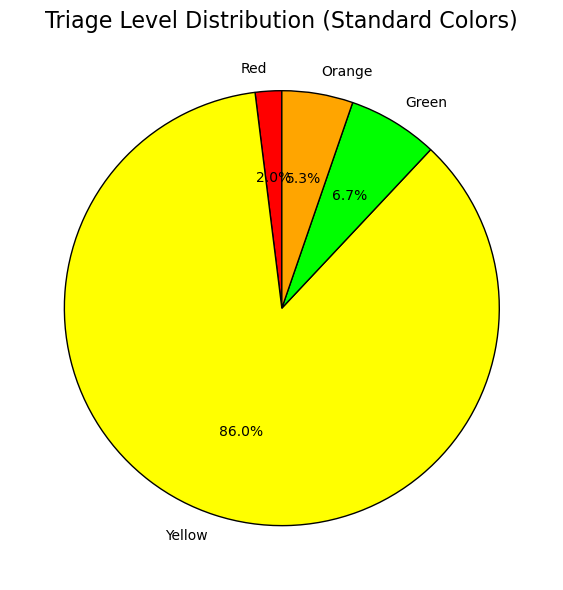

In [4]:
import matplotlib.pyplot as plt

# Data preparation
triage_counts = df['triage'].value_counts()
labels = ['Red', 'Yellow', 'Green', 'Orange']  
colors = ['#ff0000', '#ffff00', '#00ff00', '#ffa500']  # Standard triage colors

counts = [triage_counts.get(label.lower(), 0) for label in labels]

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add legend with color mapping
plt.title('Triage Level Distribution (Standard Colors)', fontsize=16)
plt.tight_layout()
plt.show()

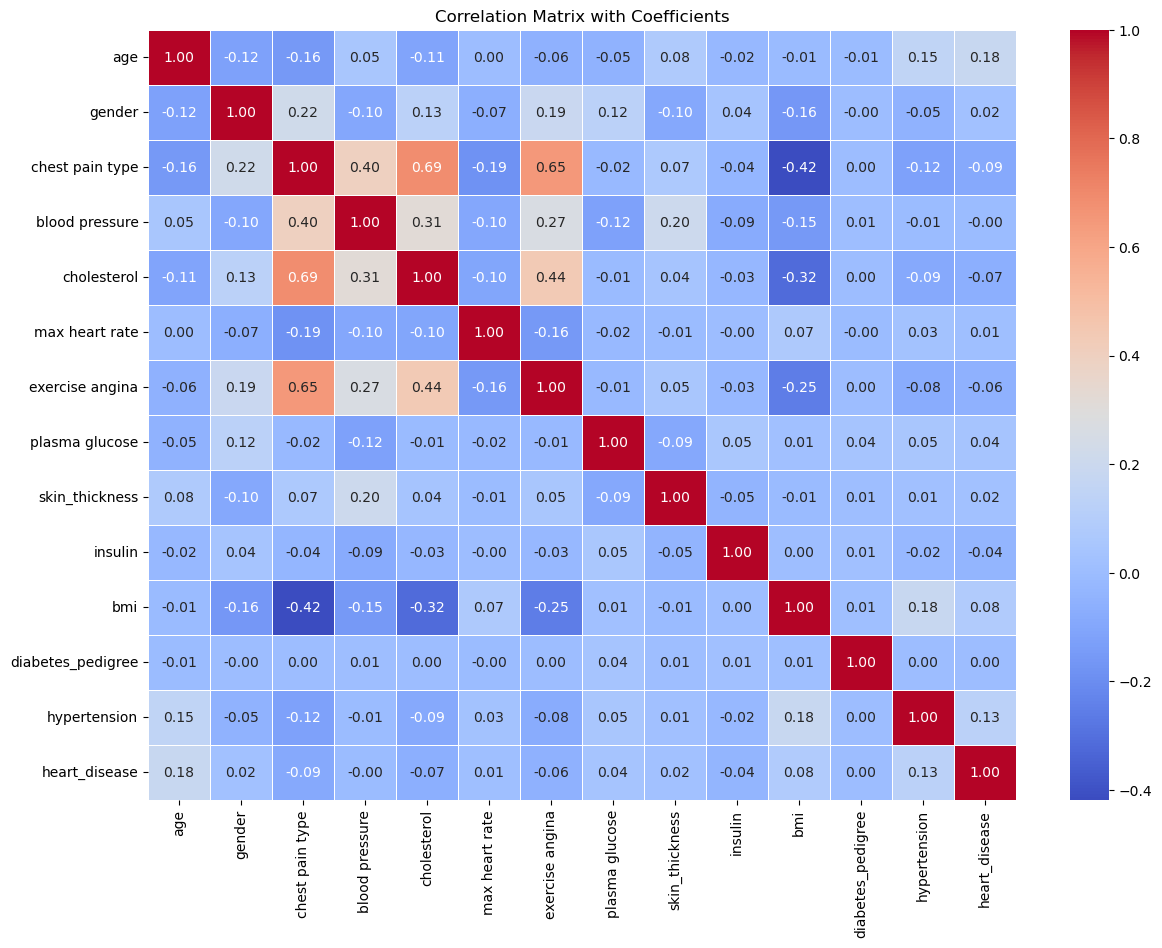

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_eda = df.copy()
df_eda['triage_label'] = le.fit_transform(df_eda['triage'])  
df_eda['triage_label'] = le.inverse_transform(df_eda['triage_label']) 

# ---------------------------------------------
# Correlation Matrix with Coefficients
plt.figure(figsize=(14, 10))
corr_matrix = df_eda.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix with Coefficients")
plt.show()

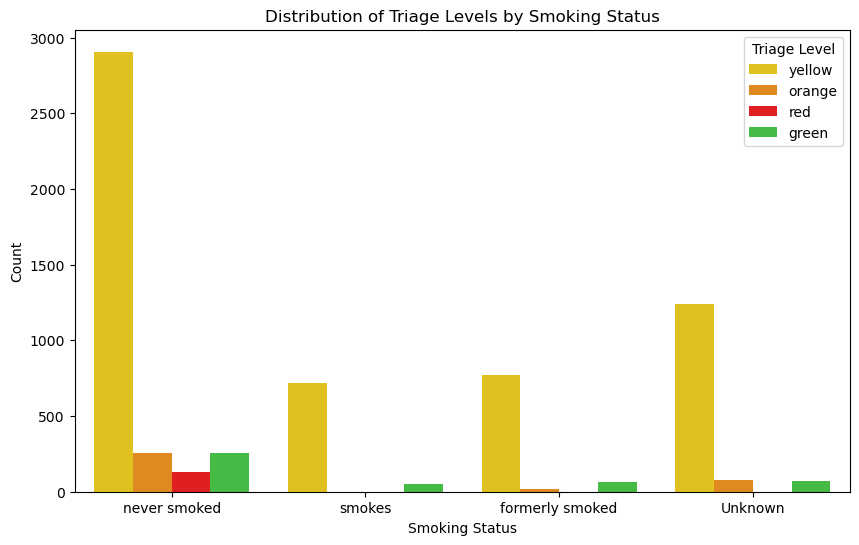

Contingency Table:
triage           green  orange  red  yellow
smoking_status                             
Unknown             70      76    0    1240
formerly smoked     67      17    0     770
never smoked       254     253  129    2907
smokes              49       0    0     720

Chi-square statistic: 214.84258165674746
p-value: 2.540656846059798e-41
Degrees of freedom: 9

Conclusion: There is a significant association between smoking status and triage levels (p < 0.05).


In [6]:
######################################################
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoking_status', hue='triage', 
             palette={'green': 'limegreen', 'yellow': 'gold', 'orange': 'darkorange','red':'red'})
plt.title('Distribution of Triage Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Triage Level')
plt.show()
#-----------------------------------------------------------------------------------------------------------
# perform the Chi-square test:
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) of smoking_status vs triage
contingency_table = pd.crosstab(df['smoking_status'], df['triage'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: There is a significant association between smoking status and triage levels (p < 0.05).")
else:
    print("\nConclusion: There is no significant association between smoking status and triage levels (p >= 0.05).")

<Figure size 1000x600 with 0 Axes>

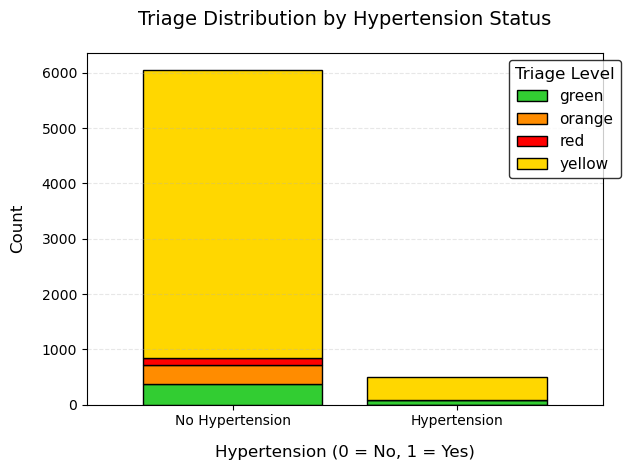

Contingency Table:
triage        green  orange  red  yellow
hypertension                            
0               365     344  129    5222
1                75       2    0     415

Expected Frequencies (if independent):
[[ 406.96  320.02  119.31 5213.71]
 [  33.04   25.98    9.69  423.29]]

Chi-square statistic: 92.195
p-value: 0.0
Degrees of freedom: 3

Conclusion: Significant association (p < 0.05). Hypertension affects triage distribution.


In [7]:
plt.figure(figsize=(10, 6))
ct = pd.crosstab(df['hypertension'], df['triage'])

triage_palette = {
    'green': 'limegreen',
    'yellow': 'gold',
    'orange': 'darkorange',
    'red': 'red' 
}
ax = ct.plot(
    kind='bar', 
    stacked=True,
    color=[triage_palette[level] for level in ct.columns],
    edgecolor='black',
    width=0.8  
)


plt.title('Triage Distribution by Hypertension Status', fontsize=14, pad=20)
plt.xlabel('Hypertension (0 = No, 1 = Yes)', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'], rotation=0)


legend = plt.legend(
    title='Triage Level',
    title_fontsize=12,
    fontsize=11,
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    edgecolor='black'
)

# Add grid 
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
# Chi-Square Test of Independence
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['hypertension'], df['triage'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies (if independent):")
print(expected.round(2))
print("\nChi-square statistic:", chi2.round(3))
print("p-value:", p_value.round(4))
print("Degrees of freedom:", dof)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Significant association (p < 0.05). Hypertension affects triage distribution.")
else:
    print("\nConclusion: No significant association (p ≥ 0.05).")

<Figure size 1000x600 with 0 Axes>

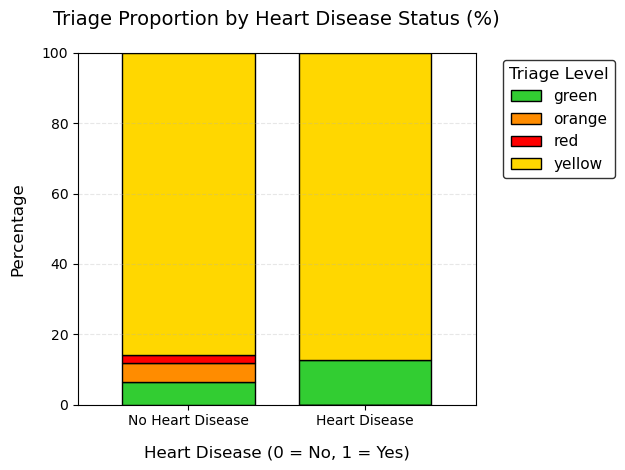

Observed Counts:
triage         green  orange  red  yellow
heart_disease                            
0                405     346  129    5399
1                 35       0    0     238

Expected Counts (if independent):
[[4.21670e+02 3.31580e+02 1.23620e+02 5.40212e+03]
 [1.83300e+01 1.44200e+01 5.38000e+00 2.34880e+02]]

Chi2 = 36.51, p = 0.0000, df = 3

CONCLUSION: There is a statistically significant association between heart disease and triage levels (χ²(3) = 36.51, p = 0.0000).


In [8]:
plt.figure(figsize=(10, 6))  #
# Calculate percentages
ct = pd.crosstab(df['heart_disease'], df['triage'], normalize='index') * 100

triage_palette = {
    'green': 'limegreen',
    'yellow': 'gold',
    'orange': 'darkorange',
    'red': 'red'  
}

ax = ct.plot(
    kind='bar',
    stacked=True,
    color=[triage_palette[level] for level in ct.columns],  # Fixed: No .get()
    edgecolor='black',
    width=0.75  
)

# Customize plot
plt.title('Triage Proportion by Heart Disease Status (%)', fontsize=14, pad=20)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12, labelpad=12)
plt.ylabel('Percentage', fontsize=12, labelpad=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.ylim(0, 100)  


#  legend
legend = plt.legend(
    title='Triage Level',
    title_fontsize=12,
    fontsize=11,
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    edgecolor='black'
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('Heart disease')
plt.show()

# Chi-Square Test of Independence

from scipy.stats import chi2_contingency

# Create contingency table (counts, not percentages)
contingency_table = pd.crosstab(df['heart_disease'], df['triage'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Observed Counts:")
print(contingency_table)
print("\nExpected Counts (if independent):")
print(expected.round(2))
print(f"\nChi2 = {chi2:.2f}, p = {p_value:.4f}, df = {dof}")

# Check assumptions (all expected counts ≥5)
if (expected < 5).any():
    print("\nWarning: Some expected counts <5. Consider Fisher's exact test.")
    lpha = 0.05  

if p_value < alpha:
    print(f"\nCONCLUSION: There is a statistically significant association between heart disease and triage levels (χ²({dof}) = {chi2:.2f}, p = {p_value:.4f}).")

<Figure size 1000x600 with 0 Axes>

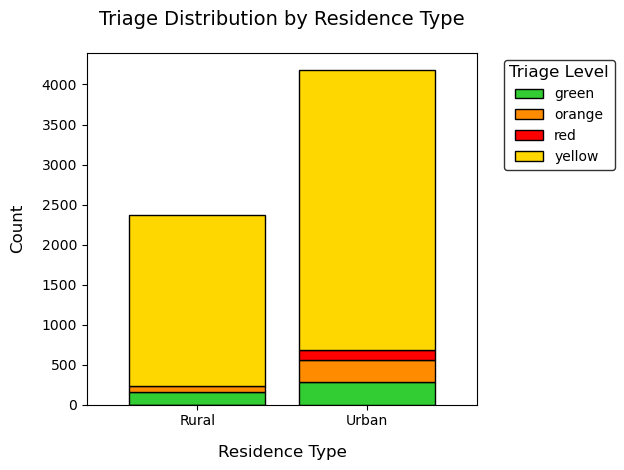

Chi-Square Statistic = 106.759
P-value = 0.0000
Degrees of Freedom (dof) = 3

Expected Frequencies (if independent):
triage               green      orange        red       yellow
Residence_type                                                
Rural           158.821734  124.891636  46.563645  2034.722985
Urban           281.178266  221.108364  82.436355  3602.277015


In [9]:
plt.figure(figsize=(10, 6))


residence_triage = pd.crosstab(df['Residence_type'], df['triage'])

triage_palette = {
    'green': 'limegreen',
    'yellow': 'gold',
    'orange': 'darkorange',
    'red': 'red'  
}


ax = residence_triage.plot(
    kind='bar',
    stacked=True,
    color=[triage_palette[level] for level in residence_triage.columns],
    edgecolor='black',
    width=0.8
)

plt.title('Triage Distribution by Residence Type', fontsize=14, pad=20)
plt.xlabel('Residence Type', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.xticks(rotation=0)

plt.legend(
    title='Triage Level',
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    edgecolor='black'
)

plt.tight_layout()
plt.savefig('residence type')
plt.show()

# Perform the Chi-Square Test:
from scipy.stats import chi2_contingency

# Create contingency table (same as your crosstab)
contingency_table = pd.crosstab(df['Residence_type'], df['triage'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"P-value = {p_value:.4f}")
print(f"Degrees of Freedom (dof) = {dof}")
print("\nExpected Frequencies (if independent):")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


<Figure size 1000x600 with 0 Axes>

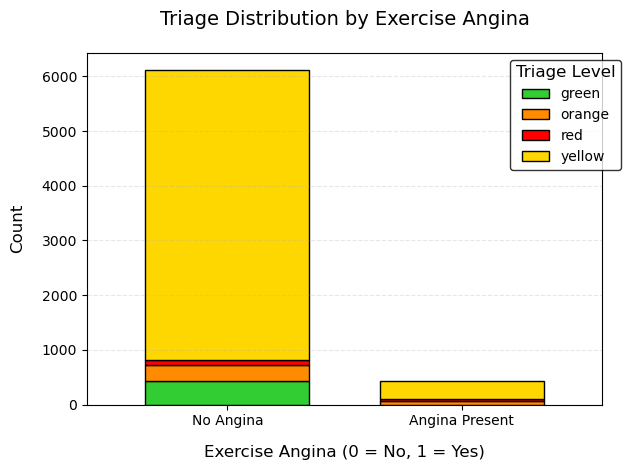

=== Chi-Square Test Results ===
Chi-Square Statistic = 212.031
P-value = 0.0000
Degrees of Freedom (dof) = 3

Expected Frequencies (if independent):
triage               green      orange        red       yellow
No Angina       411.257631  323.398046  120.57326  5268.771062
Angina Present   28.742369   22.601954    8.42674   368.228938


In [10]:
plt.figure(figsize=(10, 6))


angina_triage = pd.crosstab(df['exercise angina'], df['triage'])

triage_palette = {
    'green': 'limegreen',
    'yellow': 'gold',
    'orange': 'darkorange',
    'red': 'red'  
}


ax = angina_triage.plot(
    kind='bar',
    stacked=True,
    color=[triage_palette[level] for level in angina_triage.columns],
    edgecolor='black',
    width=0.7
)


plt.title('Triage Distribution by Exercise Angina', fontsize=14, pad=20)
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.xticks([0, 1], ['No Angina', 'Angina Present'], rotation=0)

plt.legend(
    title='Triage Level',
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    edgecolor='black'
)

ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('exercise angina')
plt.show()


# chi square test for signifcance
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['exercise angina'], df['triage'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("=== Chi-Square Test Results ===")
print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"P-value = {p_value:.4f}")
print(f"Degrees of Freedom (dof) = {dof}")
print("\nExpected Frequencies (if independent):")
print(pd.DataFrame(expected, index=['No Angina', 'Angina Present'], columns=contingency_table.columns))


<Figure size 1200x600 with 0 Axes>

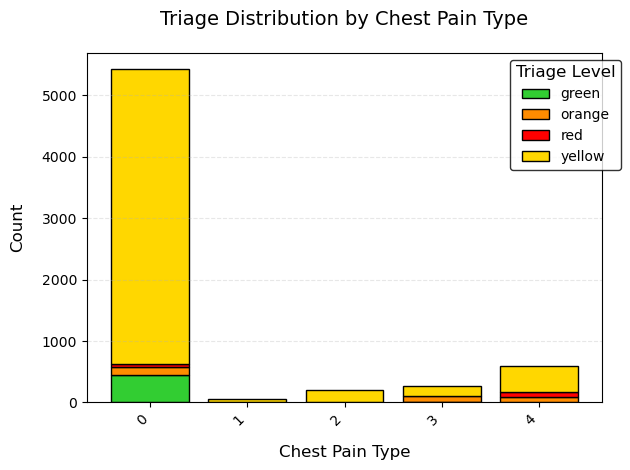

Chi-Square = 1330.38, p = 0.0000
Cramer's V = 0.260

Standardized Residuals (significant if |residual| > 2):
triage              green     orange        red    yellow
chest pain type                                          
0                3.972954  -8.354401  -5.784510  1.834882
1               -1.832417   2.682928  -0.992186 -0.002653
2               -3.746386  -3.322188  -2.028528  2.176623
3               -4.297400  22.955142  -2.326881 -4.134512
4               -6.321176  10.807194  20.535148 -4.017927


In [11]:
plt.figure(figsize=(12, 6))


pain_triage = pd.crosstab(df['chest pain type'], df['triage'])


triage_palette = {
    'green': 'limegreen',
    'yellow': 'gold',
    'orange': 'darkorange',
    'red': 'red'  
}

# Plot stacked bars
ax = pain_triage.plot(
    kind='bar',
    stacked=True,
    color=[triage_palette[level] for level in pain_triage.columns],
    edgecolor='black',
    width=0.8
)

plt.title('Triage Distribution by Chest Pain Type', fontsize=14, pad=20)
plt.xlabel('Chest Pain Type', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.xticks(rotation=45, ha='right')

plt.legend(
    title='Triage Level',
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    edgecolor='black'
)

ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('chest pain type')
plt.show()

from scipy.stats import chi2_contingency

# 1. Chi-Square Test of Independence
contingency_table = pd.crosstab(df['chest pain type'], df['triage'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# 2. Effect Size (Cramer's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

# 3. Standardized Residuals
residuals = (contingency_table - expected) / np.sqrt(expected)

print(f"Chi-Square = {chi2:.2f}, p = {p_value:.4f}")
print(f"Cramer's V = {cramers_v:.3f}")
print("\nStandardized Residuals (significant if |residual| > 2):")
print(residuals)

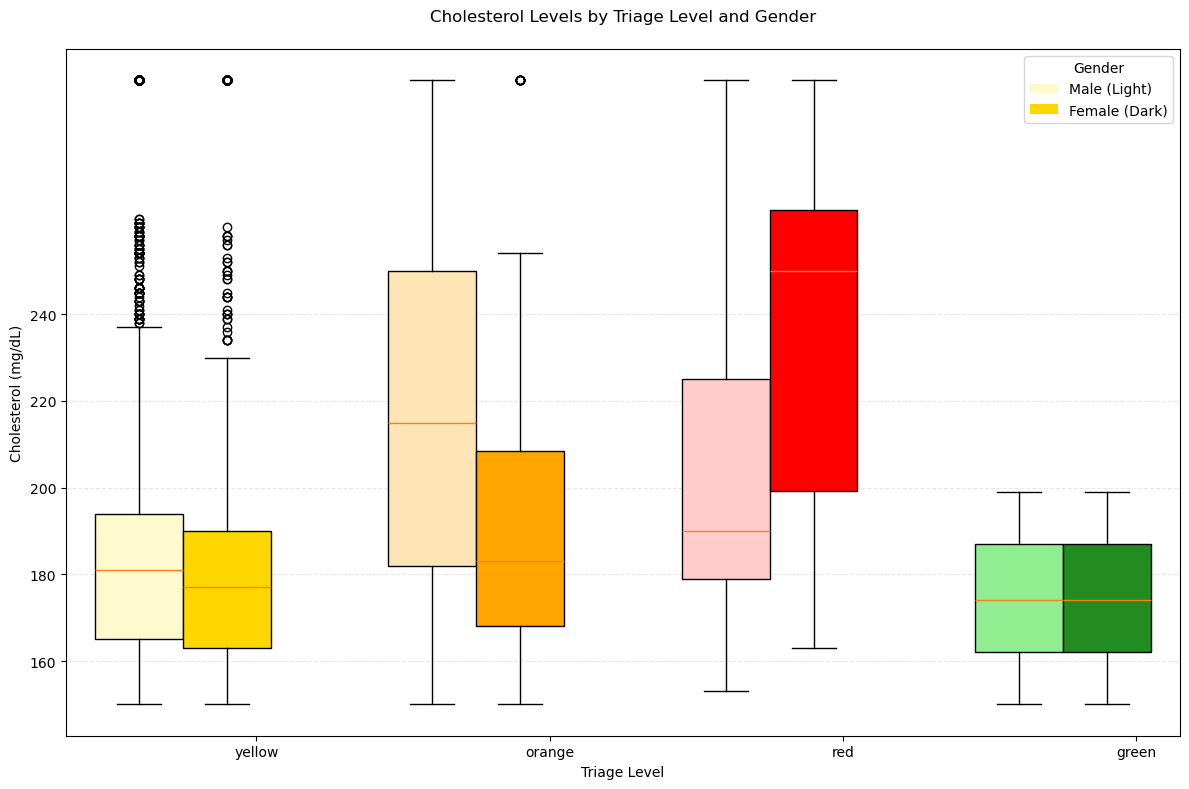

                           sum_sq      df           F        PR(>F)
C(triage)            3.354155e+05     3.0  113.287396  1.622983e-71
C(gender)            9.183680e+04     1.0   93.054313  7.110592e-22
C(triage):C(gender)  5.474528e+04     3.0   18.490352  6.098099e-12
Residual             6.458379e+06  6544.0         NaN           NaN


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define triage-specific colors with gender variants
triage_palette = {
    'yellow': {'male': '#FFFACD', 'female': '#FFD700'},  # Light/Dark yellow
    'orange': {'male': '#FFE4B5', 'female': '#FFA500'},  # Light/Dark orange
    'red':    {'male': '#FFCCCB', 'female': '#FF0000'},  # Light/Dark red
    'green':  {'male': '#90EE90', 'female': '#228B22'}   # Light/Dark green
}

plt.figure(figsize=(12, 8))

# Create custom positions for each triage-gender combination
positions = []
current_pos = 0
for triage in ['yellow', 'orange', 'red', 'green']:
    positions.extend([current_pos + 0.2, current_pos + 0.8])  # Male/Female positions
    current_pos += 2

# Manually plot each box
for i, triage in enumerate(['yellow', 'orange', 'red', 'green']):
    # Male data
    male_data = df[(df['triage'] == triage) & (df['gender'] == 1)]['cholesterol']
    box = plt.boxplot(male_data, 
                     positions=[positions[i*2]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['male'])
    
    # Female data
    female_data = df[(df['triage'] == triage) & (df['gender'] == 0)]['cholesterol']
    box = plt.boxplot(female_data, 
                     positions=[positions[i*2+1]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['female'])

# Customize axes and labels
plt.xticks(np.arange(1, 8, 2), ['yellow', 'orange', 'red', 'green'])
plt.xlabel("Triage Level")
plt.ylabel("Cholesterol (mg/dL)")
plt.yticks([160, 180, 200, 220, 240])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFFACD', label='Male (Light)'),
    Patch(facecolor='#FFD700', label='Female (Dark)')
]
plt.legend(handles=legend_elements, title="Gender")

plt.title("Cholesterol Levels by Triage Level and Gender", pad=20)
plt.tight_layout()
plt.savefig('cholesterol vs triage st gender')
plt.show()


# test significance
# Two-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('cholesterol ~ C(triage) + C(gender) + C(triage):C(gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#The two-way ANOVA revealed significant main effects of triage level (p < 0.001) and gender (p < 0.001) 
#on cholesterol levels, as well as a significant interaction (p < 0.001) between them

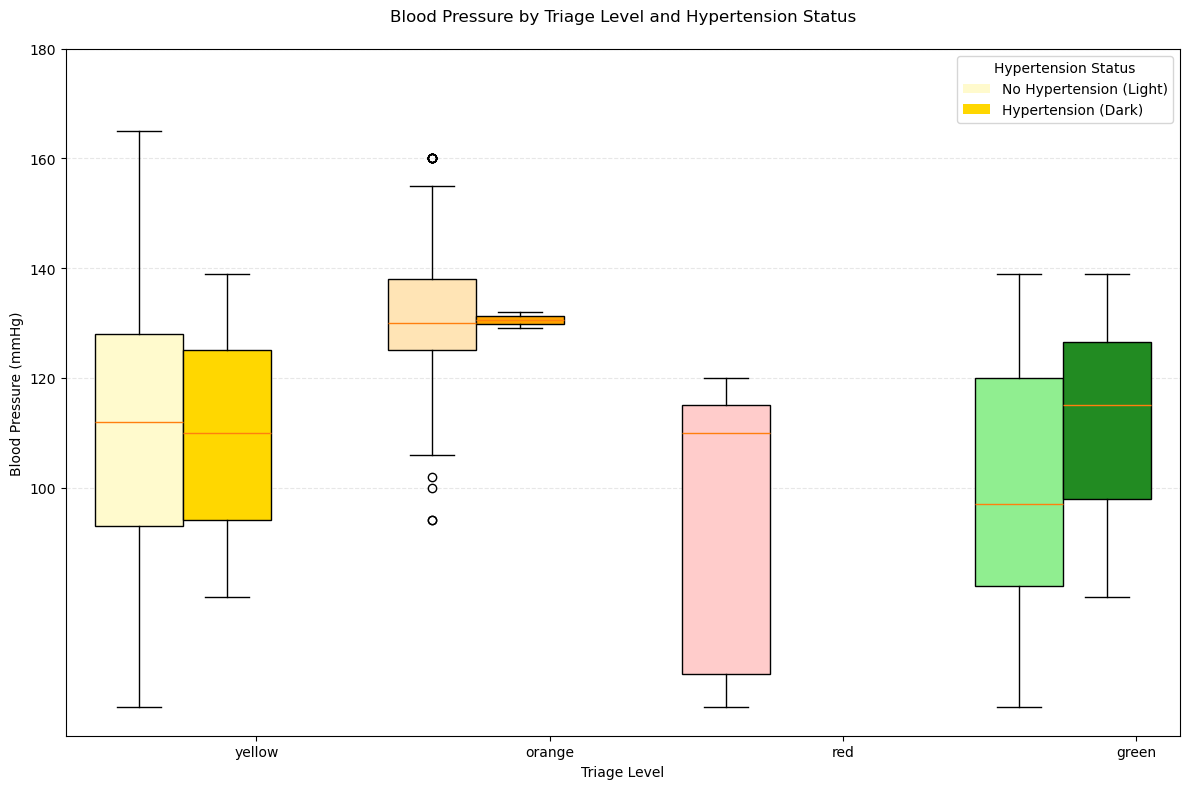

Kruskal-Wallis p-value: 0.0000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


triage_palette = {
    'yellow': {'no': '#FFFACD', 'yes': '#FFD700'},  
    'orange': {'no': '#FFE4B5', 'yes': '#FFA500'}, 
    'red':    {'no': '#FFCCCB', 'yes': '#FF0000'},  
    'green':  {'no': '#90EE90', 'yes': '#228B22'}  
}

plt.figure(figsize=(12, 8))

positions = []
current_pos = 0
for triage in ['yellow', 'orange', 'red', 'green']:
    positions.extend([current_pos + 0.2, current_pos + 0.8])  # No/Yes positions
    current_pos += 2


for i, triage in enumerate(['yellow', 'orange', 'red', 'green']):
    # No hypertension data
    no_htn_data = df[(df['triage'] == triage) & (df['hypertension'] == 0)]['blood pressure']
    box = plt.boxplot(no_htn_data, 
                     positions=[positions[i*2]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['no'])
    
    # Yes hypertension data
    yes_htn_data = df[(df['triage'] == triage) & (df['hypertension'] == 1)]['blood pressure']
    box = plt.boxplot(yes_htn_data, 
                     positions=[positions[i*2+1]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['yes'])

# Customize axes and labels
plt.xticks(np.arange(1, 8, 2), ['yellow', 'orange', 'red', 'green'])
plt.xlabel("Triage Level")
plt.ylabel("Blood Pressure (mmHg)")
plt.yticks(np.arange(100, 181, 20))  
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFFACD', label='No Hypertension (Light)'),
    Patch(facecolor='#FFD700', label='Hypertension (Dark)')
]
plt.legend(handles=legend_elements, title="Hypertension Status")

plt.title("Blood Pressure by Triage Level and Hypertension Status", pad=20)
plt.tight_layout()
plt.savefig('blood pressure vs triage st gender')
plt.show()


# Kruskal-Wallis H-test 

from scipy.stats import kruskal

# Prepare data groups
groups = [
    df[df['triage'] == 'green']['blood pressure'],
    df[df['triage'] == 'yellow']['blood pressure'],
    df[df['triage'] == 'orange']['blood pressure'],
    df[df['triage'] == 'red']['blood pressure']
]

# Run test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")
#The Kruskal-Wallis test (p < 0.001) indicates highly 
#significant differences in blood pressure across at least two triage levels.

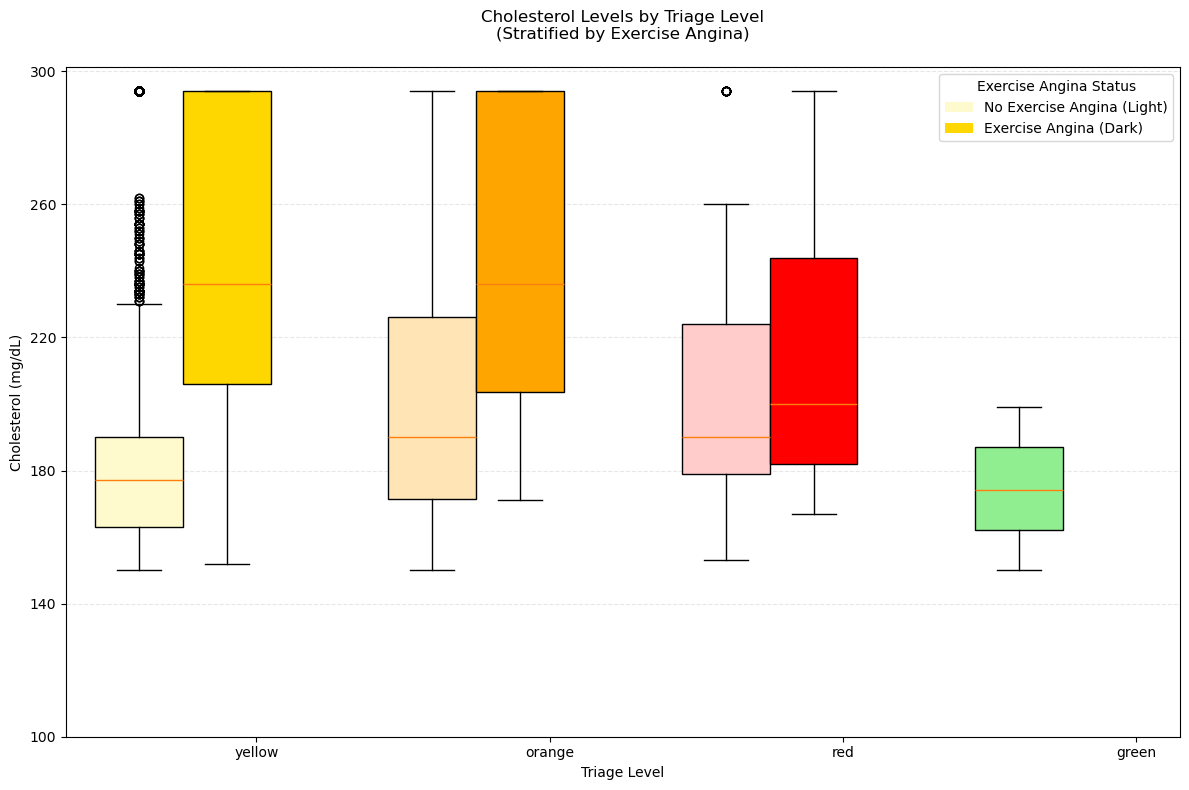

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define triage-specific colors with exercise angina variants
triage_palette = {
    'yellow': {'no': '#FFFACD', 'yes': '#FFD700'},  # Light/Dark yellow
    'orange': {'no': '#FFE4B5', 'yes': '#FFA500'},  # Light/Dark orange
    'red':    {'no': '#FFCCCB', 'yes': '#FF0000'},  # Light/Dark red
    'green':  {'no': '#90EE90', 'yes': '#228B22'}   # Light/Dark green
}

plt.figure(figsize=(12, 8))


positions = []
current_pos = 0
for triage in ['yellow', 'orange', 'red', 'green']:
    positions.extend([current_pos + 0.2, current_pos + 0.8])  
    current_pos += 2

for i, triage in enumerate(['yellow', 'orange', 'red', 'green']):
    # No exercise angina data
    no_angina_data = df[(df['triage'] == triage) & (df['exercise angina'] == 0)]['cholesterol']
    box = plt.boxplot(no_angina_data, 
                     positions=[positions[i*2]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['no'])
    
    # Yes exercise angina data
    yes_angina_data = df[(df['triage'] == triage) & (df['exercise angina'] == 1)]['cholesterol']
    box = plt.boxplot(yes_angina_data, 
                     positions=[positions[i*2+1]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['yes'])

# Customize axes and labels
plt.xticks(np.arange(1, 8, 2), ['yellow', 'orange', 'red', 'green'])
plt.xlabel("Triage Level")
plt.ylabel("Cholesterol (mg/dL)")
plt.yticks(np.arange(100, 301, 40))  # Typical cholesterol range
plt.grid(axis='y', linestyle='--', alpha=0.3)


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFFACD', label='No Exercise Angina (Light)'),
    Patch(facecolor='#FFD700', label='Exercise Angina (Dark)')
]
plt.legend(handles=legend_elements, title="Exercise Angina Status")

plt.title("Cholesterol Levels by Triage Level\n(Stratified by Exercise Angina)", pad=20)
plt.tight_layout()
plt.show()

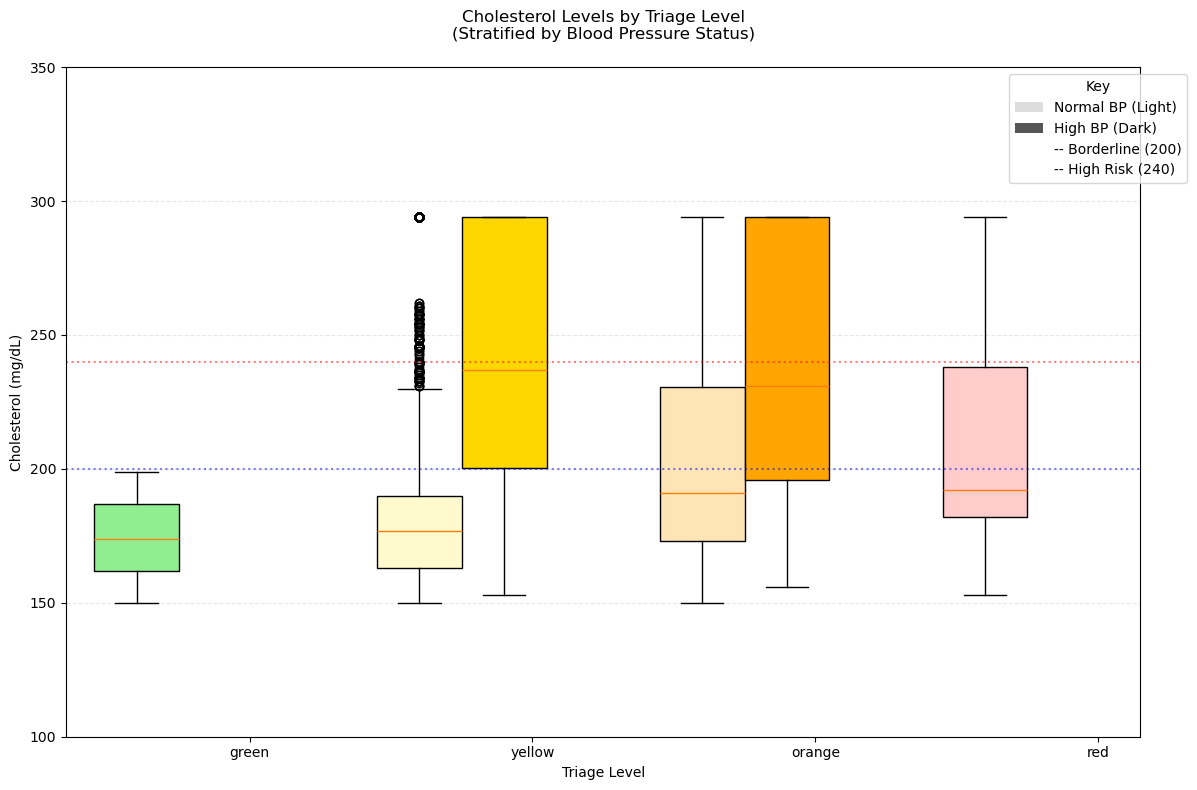

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


HIGH_BP_THRESHOLD = 140  

# Create BP status column
df['bp_status'] = np.where(df['blood pressure'] >= HIGH_BP_THRESHOLD, 'high', 'normal')

# Define triage-specific colors with BP variants
triage_palette = {
    'yellow': {'normal': '#FFFACD', 'high': '#FFD700'},  # Light/Dark yellow
    'orange': {'normal': '#FFE4B5', 'high': '#FFA500'},  # Light/Dark orange
    'red':    {'normal': '#FFCCCB', 'high': '#FF0000'},  # Light/Dark red
    'green':  {'normal': '#90EE90', 'high': '#228B22'}   # Light/Dark green
}

plt.figure(figsize=(12, 8))


positions = []
current_pos = 0
for triage in ['green', 'yellow', 'orange', 'red']:  
    positions.extend([current_pos + 0.2, current_pos + 0.8])
    current_pos += 2


for i, triage in enumerate(['green', 'yellow', 'orange', 'red']):
    # Normal BP
    normal_data = df[(df['triage'] == triage) & (df['bp_status'] == 'normal')]['cholesterol']
    box = plt.boxplot(normal_data, 
                     positions=[positions[i*2]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['normal'])
    
    # High BP
    high_data = df[(df['triage'] == triage) & (df['bp_status'] == 'high')]['cholesterol']
    box = plt.boxplot(high_data, 
                     positions=[positions[i*2+1]], 
                     widths=0.6,
                     patch_artist=True)
    plt.setp(box['boxes'], facecolor=triage_palette[triage]['high'])

# Customize plot
plt.xticks(np.arange(1, 9, 2), ['green', 'yellow', 'orange', 'red'])
plt.xlabel("Triage Level")
plt.ylabel("Cholesterol (mg/dL)")
plt.yticks(np.arange(100, 351, 50))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add clinical reference lines
plt.axhline(200, color='blue', linestyle=':', alpha=0.5, label='Borderline high')
plt.axhline(240, color='red', linestyle=':', alpha=0.5, label='High risk')

# Create legend
legend_elements = [
    Patch(facecolor='#DDDDDD', label='Normal BP (Light)'),
    Patch(facecolor='#555555', label='High BP (Dark)'),
    Patch(facecolor='none', label='-- Borderline (200)', linestyle=':', linewidth=1),
    Patch(facecolor='none', label='-- High Risk (240)', linestyle=':', linewidth=1)
]
plt.legend(handles=legend_elements, title="Key", bbox_to_anchor=(1.05, 1))

plt.title("Cholesterol Levels by Triage Level\n(Stratified by Blood Pressure Status)", pad=20)
plt.tight_layout()
plt.show()

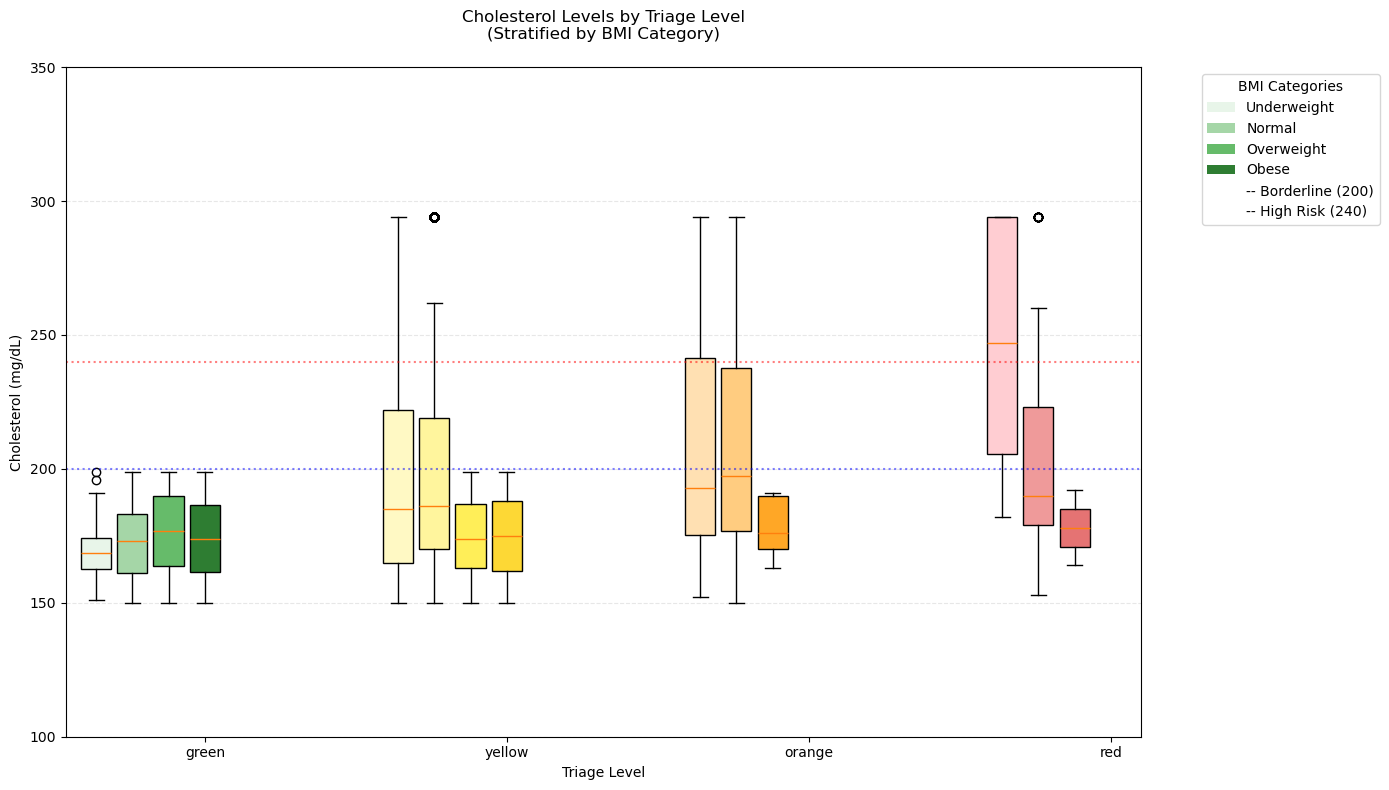

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'


df['bmi_status'] = df['bmi'].apply(categorize_bmi)


triage_palette = {
    'green': {
        'underweight': '#E8F5E9', 
        'normal': '#A5D6A7',
        'overweight': '#66BB6A',
        'obese': '#2E7D32'
    },
    'yellow': {
        'underweight': '#FFF9C4', 
        'normal': '#FFF59D',
        'overweight': '#FFEE58',
        'obese': '#FDD835'
    },
    'orange': {
        'underweight': '#FFE0B2', 
        'normal': '#FFCC80',
        'overweight': '#FFA726',
        'obese': '#FB8C00'
    },
    'red': {
        'underweight': '#FFCDD2', 
        'normal': '#EF9A9A',
        'overweight': '#E57373',
        'obese': '#D32F2F'
    }
}

plt.figure(figsize=(14, 8))


positions = []
current_pos = 0
for triage in ['green', 'yellow', 'orange', 'red']:
    positions.extend([current_pos + 0.2 + i*0.6 for i in range(4)])
    current_pos += 5

# Plot each combination
for i, triage in enumerate(['green', 'yellow', 'orange', 'red']):
    for j, bmi_cat in enumerate(['underweight', 'normal', 'overweight', 'obese']):
        data = df[(df['triage'] == triage) & (df['bmi_status'] == bmi_cat)]['cholesterol']
        box = plt.boxplot(data, 
                         positions=[positions[i*4 + j]], 
                         widths=0.5,
                         patch_artist=True)
        plt.setp(box['boxes'], facecolor=triage_palette[triage][bmi_cat])


plt.xticks(np.arange(2, 22, 5), ['green', 'yellow', 'orange', 'red'])
plt.xlabel("Triage Level")
plt.ylabel("Cholesterol (mg/dL)")
plt.yticks(np.arange(100, 351, 50))
plt.grid(axis='y', linestyle='--', alpha=0.3)


plt.axhline(200, color='blue', linestyle=':', alpha=0.5, label='Borderline high')
plt.axhline(240, color='red', linestyle=':', alpha=0.5, label='High risk')

# Create legend
legend_elements = [
    Patch(facecolor='#E8F5E9', label='Underweight'),
    Patch(facecolor='#A5D6A7', label='Normal'),
    Patch(facecolor='#66BB6A', label='Overweight'),
    Patch(facecolor='#2E7D32', label='Obese'),
    Patch(facecolor='none', label='-- Borderline (200)', linestyle=':', linewidth=1),
    Patch(facecolor='none', label='-- High Risk (240)', linestyle=':', linewidth=1)
]
plt.legend(handles=legend_elements, title="BMI Categories", bbox_to_anchor=(1.05, 1))

plt.title("Cholesterol Levels by Triage Level\n(Stratified by BMI Category)", pad=20)
plt.tight_layout()
plt.show()

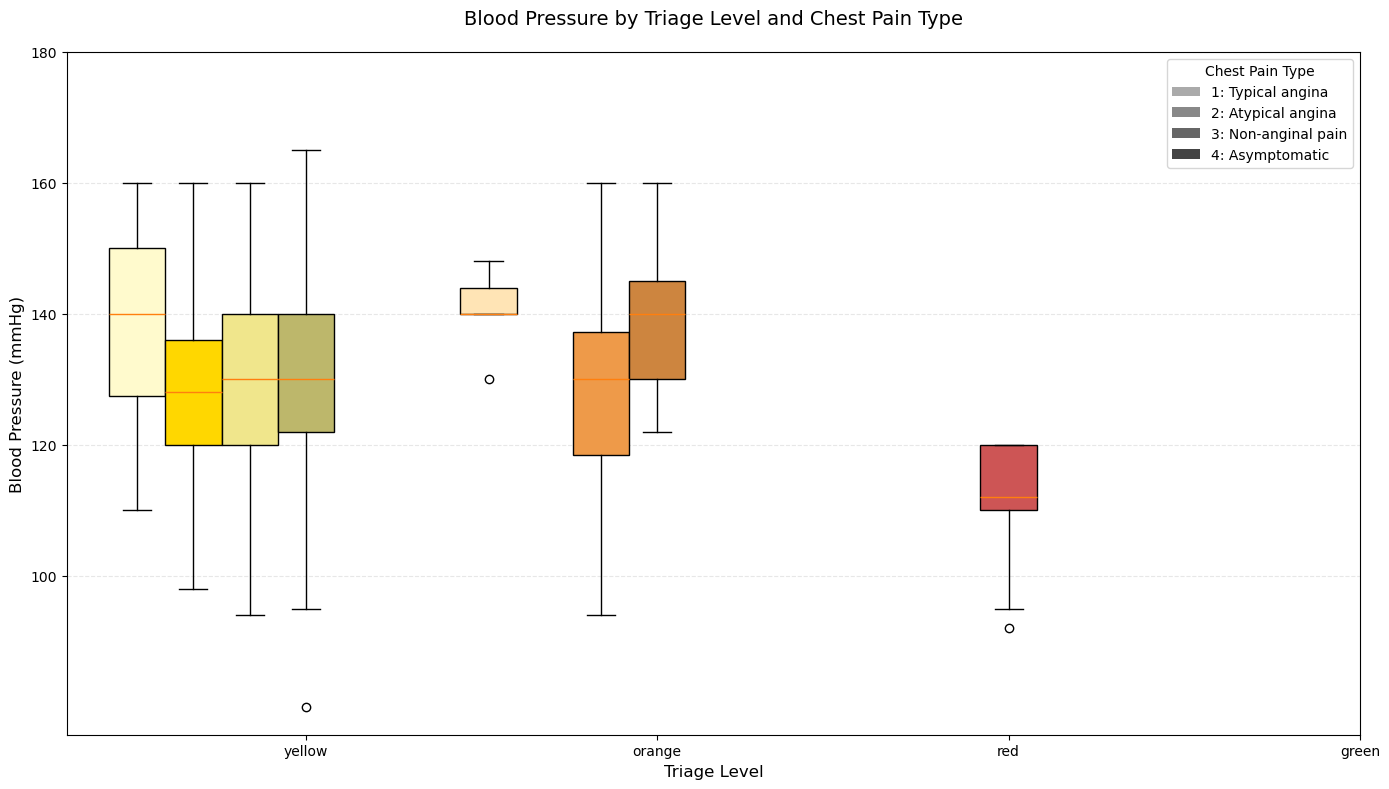

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


triage_palette = {
    'yellow': {1: '#FFFACD', 2: '#FFD700', 3: '#F0E68C', 4: '#BDB76B'},  # Yellow variants
    'orange': {1: '#FFE4B5', 2: '#FFA500', 3: '#EE9A49', 4: '#CD853F'},  # Orange variants
    'red':    {1: '#FFCCCB', 2: '#FF0000', 3: '#EE6363', 4: '#CD5555'},  # Red variants
    'green':  {1: '#90EE90', 2: '#228B22', 3: '#7CCD7C', 4: '#548B54'}   # Green variants
}

plt.figure(figsize=(14, 8))


positions = []
current_pos = 0
for triage in ['yellow', 'orange', 'red', 'green']:
    positions.extend([current_pos + 0.2, current_pos + 0.6, current_pos + 1.0, current_pos + 1.4])
    current_pos += 2.5 


for i, triage in enumerate(['yellow', 'orange', 'red', 'green']):
    for j, cp_type in enumerate([1, 2, 3, 4], start=1):
        # Filter data for this combination
        cp_data = df[(df['triage'] == triage) & (df['chest pain type'] == cp_type)]['blood pressure']
        
        if len(cp_data) > 0: 
            box = plt.boxplot(cp_data, 
                            positions=[positions[i*4 + j - 1]], 
                            widths=0.4,
                            patch_artist=True)
            plt.setp(box['boxes'], facecolor=triage_palette[triage][cp_type])


plt.xticks(np.arange(1.4, 11.1, 2.5), ['yellow', 'orange', 'red', 'green'])
plt.xlabel("Triage Level", fontsize=12)
plt.ylabel("Blood Pressure (mmHg)", fontsize=12)
plt.yticks(np.arange(100, 181, 20))  
plt.grid(axis='y', linestyle='--', alpha=0.3)


legend_elements = [
    Patch(facecolor='#AAAAAA', label='1: Typical angina'),
    Patch(facecolor='#888888', label='2: Atypical angina'),
    Patch(facecolor='#666666', label='3: Non-anginal pain'),
    Patch(facecolor='#444444', label='4: Asymptomatic')
]
plt.legend(handles=legend_elements, title="Chest Pain Type", fontsize=10)

plt.title("Blood Pressure by Triage Level and Chest Pain Type", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

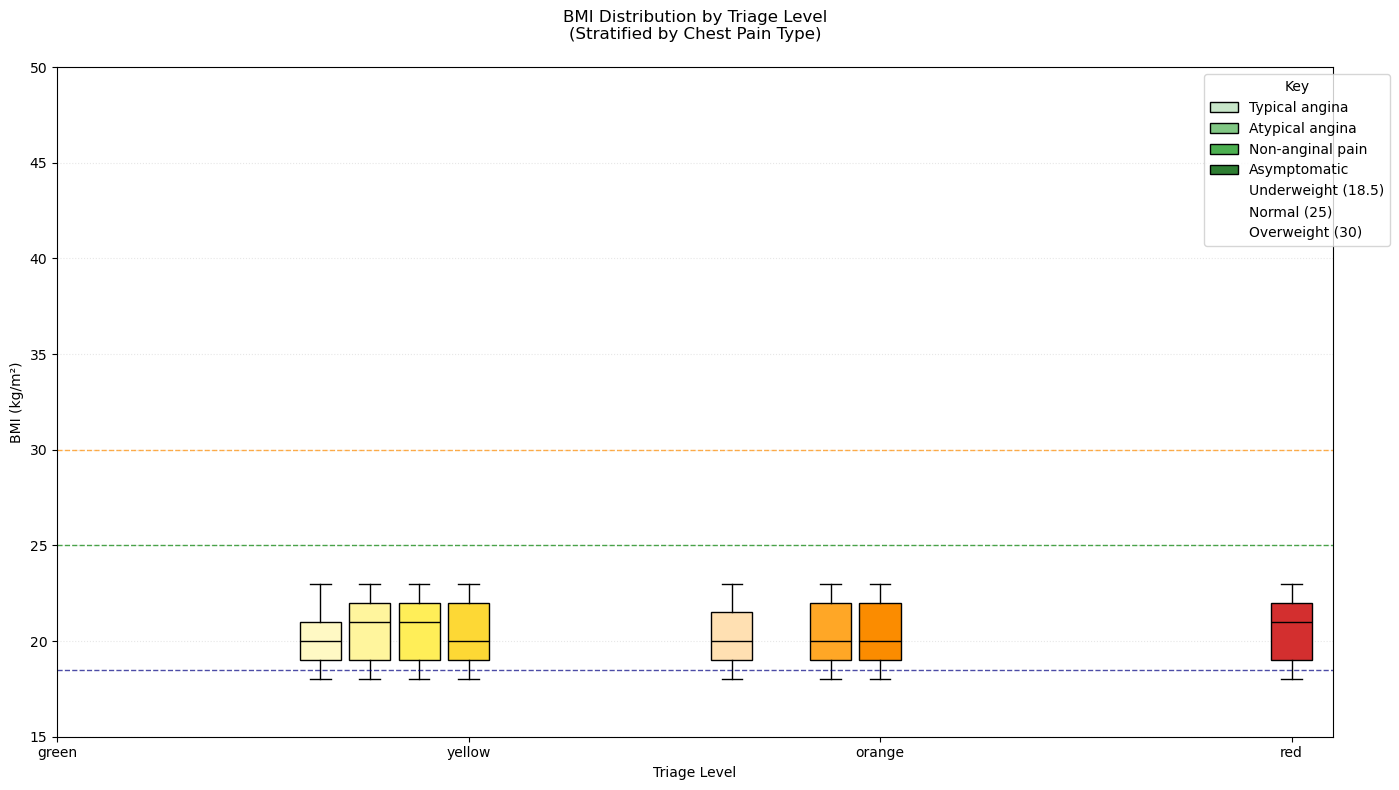

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


triage_palette = {
    'green': {
        1: '#C8E6C9', 
        2: '#81C784',  
        3: '#4CAF50',  
        4: '#2E7D32'   
    },
    'yellow': {
        1: '#FFF9C4',
        2: '#FFF59D',
        3: '#FFEE58',
        4: '#FDD835'
    },
    'orange': {
        1: '#FFE0B2',
        2: '#FFCC80',
        3: '#FFA726',
        4: '#FB8C00'
    },
    'red': {
        1: '#FFCDD2',
        2: '#EF9A9A',
        3: '#E57373',
        4: '#D32F2F'
    }
}

plt.figure(figsize=(14, 8))


positions = []
current_pos = 0
for triage in ['green', 'yellow', 'orange', 'red']:  
    positions.extend([current_pos + 0.2 + i*0.6 for i in range(4)])
    current_pos += 5


for i, triage in enumerate(['green', 'yellow', 'orange', 'red']):
    for j, cp_type in enumerate([1, 2, 3, 4]):
        data = df[(df['triage'] == triage) & (df['chest pain type'] == cp_type)]['bmi']
        if len(data) > 0:  
            box = plt.boxplot(data, 
                            positions=[positions[i*4 + j]], 
                            widths=0.5,
                            patch_artist=True)
            plt.setp(box['boxes'], facecolor=triage_palette[triage][cp_type], edgecolor='black')
            plt.setp(box['whiskers'], color='black')
            plt.setp(box['caps'], color='black')
            plt.setp(box['medians'], color='black')


plt.ylim(15, 50)


plt.axhline(18.5, color='navy', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(25, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(30, color='darkorange', linestyle='--', linewidth=1, alpha=0.7)

plt.title("BMI Distribution by Triage Level\n(Stratified by Chest Pain Type)", pad=20)
plt.xticks(np.arange(2, 22, 5), ['green', 'yellow', 'orange', 'red'])
plt.xlabel("Triage Level")
plt.ylabel("BMI (kg/m²)")
plt.grid(axis='y', linestyle=':', alpha=0.3)

# Improved legend
legend_elements = [
    Patch(facecolor='#C8E6C9', edgecolor='black', label='Typical angina'),
    Patch(facecolor='#81C784', edgecolor='black', label='Atypical angina'),
    Patch(facecolor='#4CAF50', edgecolor='black', label='Non-anginal pain'),
    Patch(facecolor='#2E7D32', edgecolor='black', label='Asymptomatic'),
    Patch(facecolor='none', label='Underweight (18.5)', linestyle='--', linewidth=1),
    Patch(facecolor='none', label='Normal (25)', linestyle='--', linewidth=1),
    Patch(facecolor='none', label='Overweight (30)', linestyle='--', linewidth=1)
]

plt.legend(handles=legend_elements, title="Key", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5772\2001352138.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_5772\2001352138.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


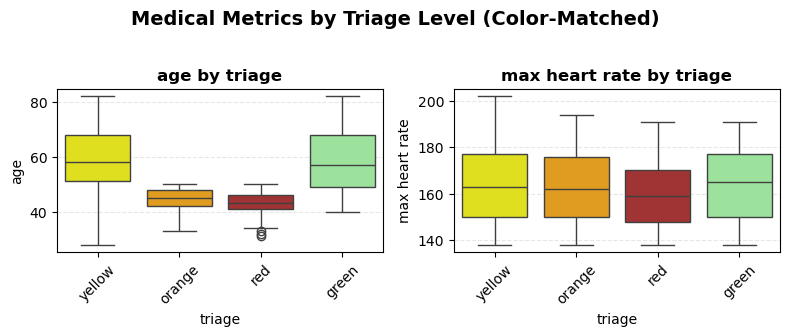


=== Statistical Tests ===

=== Age by Triage Level ===
Kruskal-Wallis H-statistic: 819.604
p-value: 0.0000 (significant)

=== Blood Pressure by Triage Level ===
Kruskal-Wallis H-statistic: 468.248
p-value: 0.0000 (significant)

=== Cholesterol by Triage Level ===
Kruskal-Wallis H-statistic: 214.334
p-value: 0.0000 (significant)

=== Max Heart Rate by Triage Level ===
Kruskal-Wallis H-statistic: 7.975
p-value: 0.0465 (significant)


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kruskal


triage_colors = {
    'yellow': 'yellow',
    'orange': 'orange',
    'red': 'firebrick',
    'green': 'lightgreen'
}


features_to_plot = ['age', 'max heart rate']


plt.figure(figsize=(8, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    
    
    present_triage = sorted(df['triage'].unique(), 
                          key=lambda x: list(triage_colors.keys()).index(x))
    
    
    sns.boxplot(
        data=df,
        x='triage',
        y=feature,
        order=present_triage,
        palette=[triage_colors[t] for t in present_triage]
    )
    
    plt.title(f'{feature} by triage', fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle('Medical Metrics by Triage Level (Color-Matched)', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('significant box plot')
plt.show()

# Statistical tests
print('\n=== Statistical Tests ===')

# 1. Age by Triage Level
print('\n=== Age by Triage Level ===')
age_groups = [df[df['triage'] == level]['age'].dropna() for level in ['red', 'orange', 'yellow', 'green']]
stat, p = kruskal(*age_groups)
print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")

# 2. Blood Pressure by Triage Level
print('\n=== Blood Pressure by Triage Level ===')
bp_groups = [df[df['triage'] == level]['blood pressure'].dropna() for level in ['red', 'orange', 'yellow', 'green']]
stat, p = kruskal(*bp_groups)
print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")

# 3. Cholesterol by Triage Level
print('\n=== Cholesterol by Triage Level ===')
chol_groups = [df[df['triage'] == level]['cholesterol'].dropna() for level in ['red', 'orange', 'yellow', 'green']]
stat, p = kruskal(*chol_groups)
print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")

# 4. Max Heart Rate by Triage Level
print('\n=== Max Heart Rate by Triage Level ===')
hr_groups = [df[df['triage'] == level]['max heart rate'].dropna() for level in ['red', 'orange', 'yellow', 'green']]
stat, p = kruskal(*hr_groups)
print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")

C:\Users\HP\AppData\Local\Temp\ipykernel_5772\1275097080.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_5772\1275097080.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_5772\1275097080.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


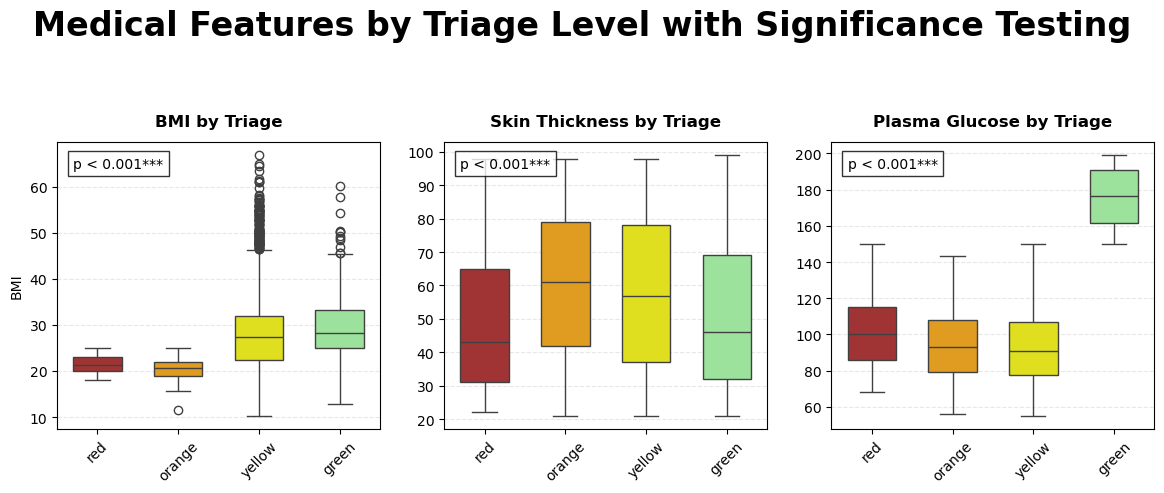


BMI (Kruskal-Wallis):
H-statistic = 596.048, p-value = 0.0000

Pairwise Comparisons (Mann-Whitney U):
red vs orange: p = 0.0009***
red vs yellow: p = 0.0000***
red vs green: p = 0.0000***
orange vs yellow: p = 0.0000***
orange vs green: p = 0.0000***
yellow vs green: p = 0.0000***

Skin Thickness (Kruskal-Wallis):
H-statistic = 48.161, p-value = 0.0000

Pairwise Comparisons (Mann-Whitney U):
red vs orange: p = 0.0000***
red vs yellow: p = 0.0000***
red vs green: p = 0.2287
orange vs yellow: p = 0.0818
orange vs green: p = 0.0000***
yellow vs green: p = 0.0000***

Plasma Glucose (Kruskal-Wallis):
H-statistic = 1249.993, p-value = 0.0000

Pairwise Comparisons (Mann-Whitney U):
red vs orange: p = 0.0006***
red vs yellow: p = 0.0000***
red vs green: p = 0.0000***
orange vs yellow: p = 0.2254
orange vs green: p = 0.0000***
yellow vs green: p = 0.0000***


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import numpy as np


triage_colors = {
    'red': 'firebrick',
    'orange': 'orange',
    'yellow': 'yellow',
    'green': 'lightgreen'
}


features_to_plot = [ 'bmi', 'skin_thickness' , 'plasma glucose']
feature_names = ['BMI', 'Skin Thickness',  'Plasma Glucose']


plt.figure(figsize=(12, 8))

for i, (feature, name) in enumerate(zip(features_to_plot, feature_names), 1):
    ax = plt.subplot(2, 3, i)
    
    
    present_triage = [t for t in triage_colors.keys() if t in df['triage'].unique()]
    
   
    sns.boxplot(
        data=df,
        x='triage',
        y=feature,
        order=present_triage,
        palette=[triage_colors[t] for t in present_triage],
        width=0.6
    )
    
    # Statistical test
    groups = [df[df['triage'] == t][feature].dropna() for t in present_triage]
    if len(present_triage) > 1:  # Only test if >1 group present
        stat, p_value = kruskal(*groups)
        
        # Add annotation
        if p_value < 0.001:
            sig_text = 'p < 0.001***'
        elif p_value < 0.01:
            sig_text = f'p = {p_value:.3f}**'
        elif p_value < 0.05:
            sig_text = f'p = {p_value:.3f}*'
        else:
            sig_text = f'p = {p_value:.3f}'
            
        ax.text(0.05, 0.95, sig_text, 
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top', 
                bbox=dict(facecolor='white', alpha=0.8))
    
    
    plt.title(f'{name} by Triage', fontweight='bold', pad=12)
    plt.xlabel('Triage Level' if i in [4,5,6] else '', fontsize=10)
    plt.ylabel(name if i in [1,4] else '', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle('Medical Features by Triage Level with Significance Testing', 
             y=1.02, fontsize=24, fontweight='bold')
plt.tight_layout(pad=2.0)
plt.savefig('significant box plot2')
plt.show()



for feature, name in zip(features_to_plot, feature_names):
    present_triage = [t for t in triage_colors.keys() if t in df['triage'].unique()]
    if len(present_triage) < 2:
        print(f"\n{name}: Only 1 triage level present - cannot test")
        continue
        
    groups = [df[df['triage'] == t][feature].dropna() for t in present_triage]
    stat, p_value = kruskal(*groups)
    
    print(f"\n{name} (Kruskal-Wallis):")
    print(f"H-statistic = {stat:.3f}, p-value = {p_value:.4f}")
    
    if p_value < 0.05 and len(present_triage) > 2:
        print("\nPairwise Comparisons (Mann-Whitney U):")
        n_comparisons = len(present_triage) * (len(present_triage) - 1) // 2
        bonferroni_alpha = 0.05 / n_comparisons
        
        for i in range(len(present_triage)):
            for j in range(i+1, len(present_triage)):
                group1 = df[df['triage'] == present_triage[i]][feature].dropna()
                group2 = df[df['triage'] == present_triage[j]][feature].dropna()
                _, p = mannwhitneyu(group1, group2)
                
                if p < bonferroni_alpha:
                    sig = "***"
                elif p < 0.01:
                    sig = "**"
                elif p < 0.05:
                    sig = "*"
                else:
                    sig = ""
                
                print(f"{present_triage[i]} vs {present_triage[j]}: p = {p:.4f}{sig}")